<a href="https://colab.research.google.com/github/HoangKhoi1704/Temp/blob/main/AppleStock_Analyse_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Download thư viện ta (Technical Analysis)</h1>
<p>Dùng để xây dựng chiến lược lược giao dịch định lượng</p>

In [97]:
pip install ta

In [98]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import ta
from ta.momentum import RSIIndicator
from ta.trend import MACD

<h1>Câu 1: Cách thu thập dữ liệu<h1>
<p>dữ liệu là mã chứng khoán Apple được lấy từ thư viện tfinance của python và dùng giá đóng cửa để phân tích và xây dựng các chiến lược</p>

In [99]:
# Tải dữ liệu cổ phiếu Apple từ 2020 đến 2024
dt = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
dt.to_csv('AAPL.csv')

df = dt[['Close', 'Volume']].reset_index()
df.columns = ['Date', 'Close', 'Volume']
df.set_index('Date', inplace=True)

# Chuyển sang dữ liệu theo tuần
df_weekly = df.resample('W').agg({
    'Close': 'last',
    'Volume': 'sum'
})

# Drop rows with NaN values resulting from resampling
df_weekly.dropna(inplace=True)

# Reset the index to make 'Date' a column again
df_weekly.reset_index(inplace=True)
dt = df_weekly
df = dt

df

[*********************100%***********************]  1 of 1 completed


,Date,Close,Volume
0,2020-01-05,71.914818,281803200
1,2020-01-12,75.033875,670091600
2,2020-01-19,77.064903,652055600
3,2020-01-26,76.963341,463685200
4,2020-02-02,74.835594,866734800
...,...,...,...
257,2024-12-08,242.255600,208286500
258,2024-12-15,247.532883,192702600
259,2024-12-22,253.877594,368202900
260,2024-12-29,254.974930,133685900


<h1>Câu 2: Trực quan hóa dữ liệu: giá đóng cửa từ đầu 2020 đến cuối 2024</h1>

In [100]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=('Biểu đồ giá đóng cửa cổ phiếu AAPL', 'Biểu đồ khối lượng giao dịch cổ phiếu AAPL theo tuần'),
                    vertical_spacing=0.1)

# Add Close price trace
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'), row=1, col=1)

# Add Volume trace
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], name='Volume'), row=2, col=1)

# Update layout
fig.update_layout(height=600, title_text='Biểu đồ giá và khối lượng giao dịch cổ phiếu AAPL')

fig.show()

<h1>Câu 3: Tiền xử lý dữ liệu</h1>


*   Kiểm tra xem có missing value không
*   Dùng Boxplot để xác định giá trị ngoại lai
*   Giá trung bình
*   Giá trung vị
*   Giá lớn nhất
*   Giá nhỏ nhất







In [101]:
print(df.isnull().sum())

# Kết quả cho thấy không có giá trị nào missing

Date      0
Close     0
Volume    0
dtype: int64


In [102]:
from scipy import stats

def clean_data(dt):
    df = dt.copy()
    df.drop_duplicates(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Close'] > 0]
    z_scores = np.abs(stats.zscore(df['Close']))
    df = df[z_scores <= 3]

    df = df[df['Volume'] > 0]
    z_scores = np.abs(stats.zscore(df['Volume']))
    df = df[z_scores <= 3]

    return df

clean_data(dt)

,Date,Close,Volume
0,2020-01-05,71.914818,281803200
1,2020-01-12,75.033875,670091600
2,2020-01-19,77.064903,652055600
3,2020-01-26,76.963341,463685200
4,2020-02-02,74.835594,866734800
...,...,...,...
257,2024-12-08,242.255600,208286500
258,2024-12-15,247.532883,192702600
259,2024-12-22,253.877594,368202900
260,2024-12-29,254.974930,133685900


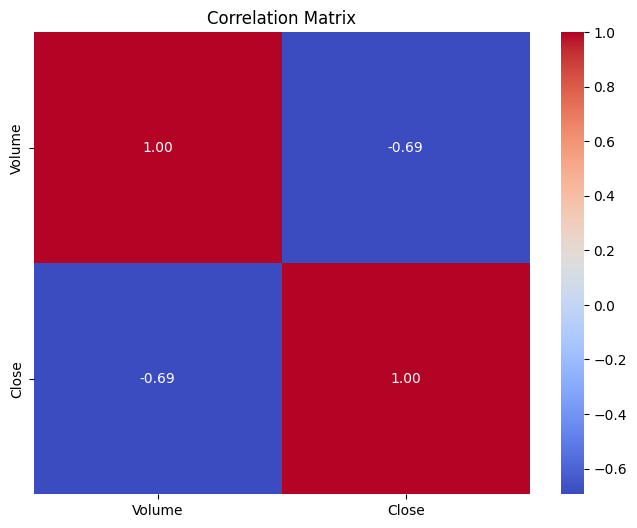

In [103]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [104]:
print(f"Giá trị trung bình của cổ phiếu là: {int(df['Close'].mean())} $")
print(f"Giá trị trung vị của cổ phiếu là: {int(df['Close'].median())} $")
print(f"Giá trị lớn nhất của cổ phiếu là: {int(df['Close'].max())} $")
print(f"Giá trị nhỏ nhất của cổ phiếu là: {int(df['Close'].min())} $")

Giá trị trung bình của cổ phiếu là: 152 $
Giá trị trung vị của cổ phiếu là: 151 $
Giá trị lớn nhất của cổ phiếu là: 254 $
Giá trị nhỏ nhất của cổ phiếu là: 55 $


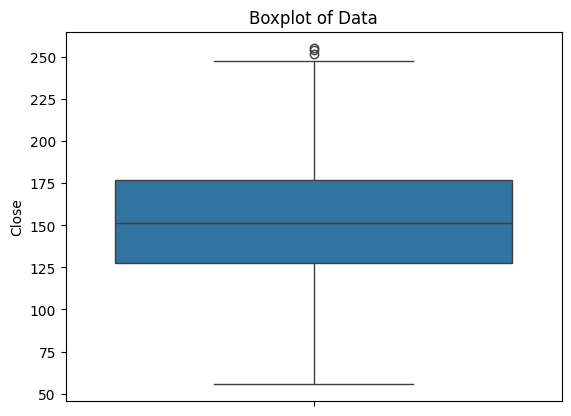

In [105]:
# Biểu đồ boxplot để xác định các giá trị ngoại lai
sns.boxplot(data=df['Close'])
plt.title('Boxplot of Data')
plt.show()

<h1>Câu 4: Xây dựng 3 chiến lược đầu tư</h1>

*   SMA
*   MACD
*   Bollinger Band


**<h2>1 Chiến lược SMA (đường trung bình)</h2>**

*   Là chiến lược dựa trên hai đường trung bình động (moving averages): một ngắn hạn (7 ngày - SMA1 vì đã thay đổi theo tuần) và một dài hạn (140 ngày - SMA20).
*   Khi đường MA ngắn hạn cắt lên đường dài hạn → Tín hiệu MUA (Golden Cross).
*   Khi đường MA ngắn hạn cắt xuống đường dài hạn → Tín hiệu BÁN (Death Cross).





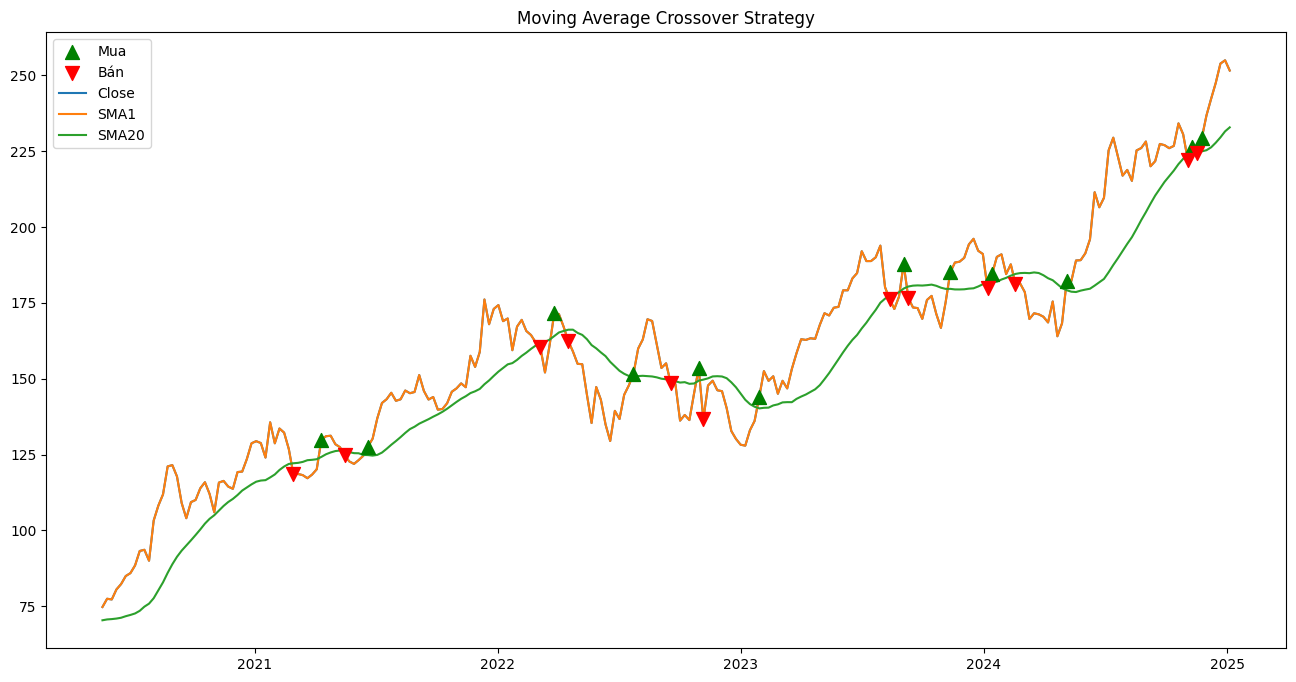

In [106]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)


df['SMA1'] = df['Close'].rolling(1).mean()
df['SMA20'] = df['Close'].rolling(20).mean()

# Tạo tín hiệu giao dịch
df['SMA_Signal'] = 0
df.loc[df['SMA1'] > df['SMA20'], 'SMA_Signal'] = 1
df.loc[df['SMA1'] < df['SMA20'], 'SMA_Signal'] = -1

# Tạo cột vị thế mua/bán (Long only: 1 for Buy, 0 for Hold/Sell)
df['Position'] = df['SMA_Signal'].shift(1)
df['Position'] = df['Position'].replace(-1, 0) # Assuming a long-only strategy

# Tính chiến lược (lợi nhuận tiềm năng)
df['SMA_Return'] = df['Position'] * df['Close'].pct_change()

data = df[['Date', 'Volume', 'SMA_Return', 'Close', 'SMA1', 'SMA20', 'SMA_Signal', 'Position']].reset_index()

# Xóa các giá trị NaN
df.dropna(inplace=True)

# Xác định vị trí mua/bán
df['Buy_Signal'] = (df['SMA1'] > df['SMA20']) & (df['SMA1'].shift(1) <= df['SMA20'].shift(1))
df['Sell_Signal'] = (df['SMA1'] < df['SMA20']) & (df['SMA1'].shift(1) >= df['SMA20'].shift(1))
buy_signals = df[df['Buy_Signal']]
sell_signals = df[df['Sell_Signal']]

# Vẽ biểu đồ
plt.figure(figsize=(16, 8))

plt.scatter(buy_signals.Date, buy_signals['Close'], marker='^', color='green', label='Mua', s=100, zorder=10)
plt.scatter(sell_signals.Date, sell_signals['Close'], marker='v', color='red', label='Bán', s=100, zorder=10)

plt.plot(df.Date, df['Close'], label='Close')
plt.plot(df.Date, df['SMA1'], label='SMA1')
plt.plot(df.Date, df['SMA20'], label='SMA20')

plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

**<h2>2 Chiến lược MACD</h2>**

*   MACD = EMA(2) - EMA(4)
*   Đường MACD là hiệu của hai đường trung bình động lũy thừa (EMA)
*  Signal line = EMA(9) của MACD
*   Khi MACD cắt lên signal → Tín hiệu mua
*   Khi MACD cắt xuống signal → Tín hiệu bán












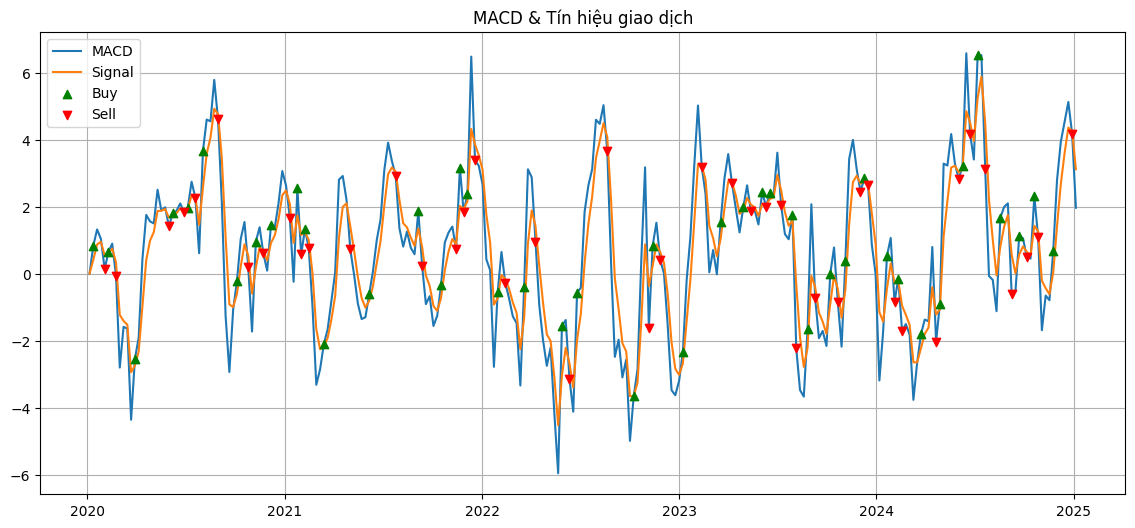

In [107]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)

# Tính MACD và Signal Line
df['EMA12'] = df['Close'].ewm(span=2, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=4, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=3, adjust=False).mean()

# Tạo tín hiệu mua/bán
df['MACD_Signal'] = 0
df.loc[(df['MACD'] > df['Signal']) & (df['MACD'].shift(1) <= df['Signal'].shift(1)), 'MACD_Signal'] = 1
df.loc[(df['MACD'] < df['Signal']) & (df['MACD'].shift(1) >= df['Signal'].shift(1)), 'MACD_Signal'] = -1

# Tính lợi nhuận chiến lược
df['MACD_Return'] = df['MACD_Signal'].shift(1) * df['Close'].pct_change()
# df['Cumulative_MACD'] = (1 + df['MACD_Return']).cumprod()

data = pd.concat([data, df[['MACD_Return', 'EMA12', 'EMA26', 'MACD', 'MACD_Signal']]], axis=1)

# (Tuỳ chọn) Vẽ MACD với điểm mua/bán
buy_signals = df[df['MACD_Signal'] == 1]
sell_signals = df[df['MACD_Signal'] == -1]

plt.figure(figsize=(14,6))
plt.plot(df.Date, df['MACD'], label='MACD')
plt.plot(df.Date, df['Signal'], label='Signal')
plt.scatter(buy_signals.Date, buy_signals['MACD'], label='Buy', marker='^', color='green', zorder=10)
plt.scatter(sell_signals.Date, sell_signals['MACD'], label='Sell', marker='v', color='red', zorder=10)
plt.title('MACD & Tín hiệu giao dịch')
plt.legend()
plt.grid(True)
plt.show()


**<h2>3 Chiến lược Bollinger Band (đường trung bình)</h2>**

Gồm 3 dải (bands):
*   Dải giữa	Trung bình động đơn giản (SMA) trong N phiên
*   Dải trên	SMA + k × Độ lệch chuẩn (standard deviation)
*   Dải dưới	SMA - k × Độ lệch chuẩn
*   SMA: 10 tuần
*   K = 1.5

Diễn giải	Ý nghĩa thực tế:
*   Giá chạm dải trên	Có thể đang ở vùng quá mua – sắp điều chỉnh giảm
*   Giá chạm dải dưới	Có thể đang ở vùng quá bán – có thể đảo chiều tăng
*   Dải bó hẹp (thu hẹp)	Biến động thấp – thường là dấu hiệu sắp có biến động mạnh
*   Dải mở rộng	Biến động mạnh – thị trường đang biến động lớn








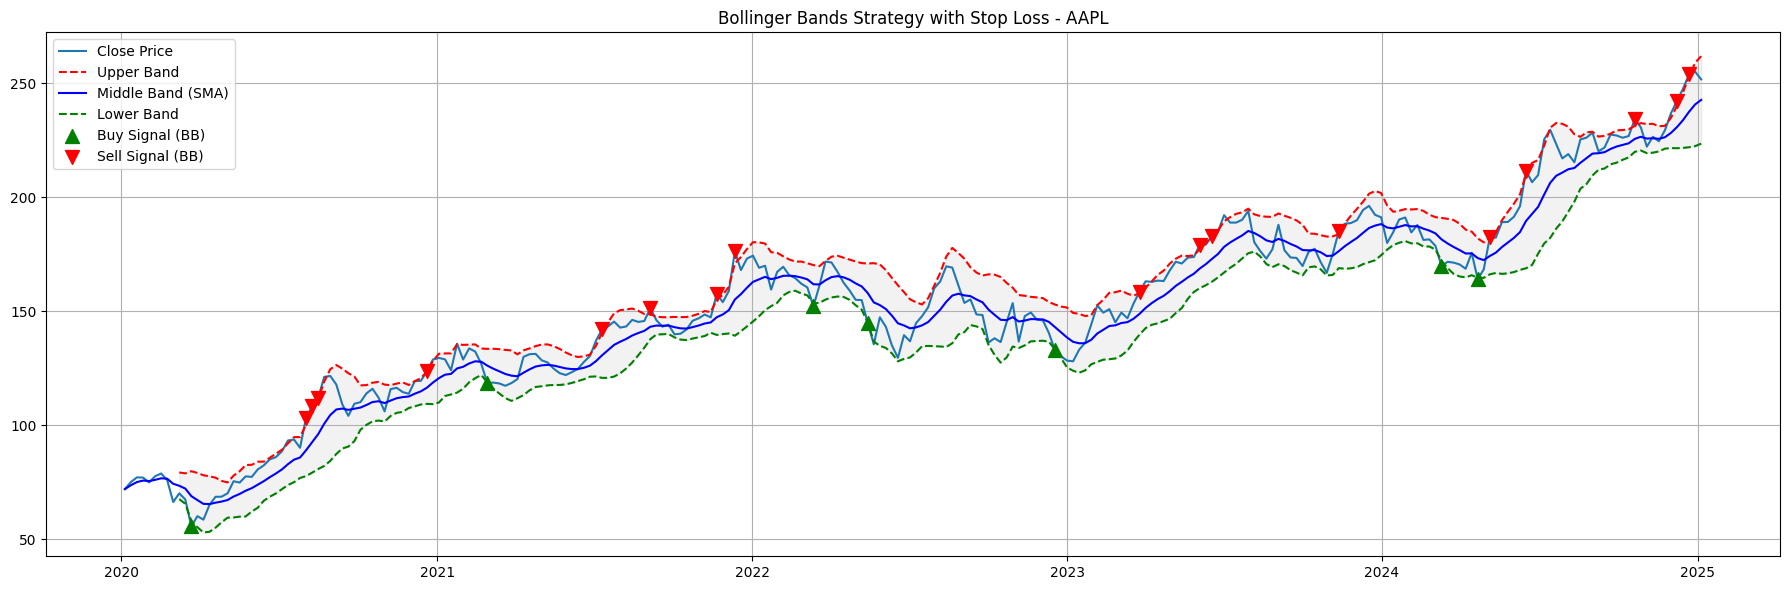

In [108]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)

# === Cài đặt thông số ===
window = 10
multiplier = 1.5
stop_loss_pct = 0.05  # Stop Loss 5%

# === Tính các chỉ báo kỹ thuật ===
df['SMA'] = df['Close'].ewm(span=window).mean()
df['STD'] = df['Close'].rolling(window=window).std()
df['Upper'] = df['SMA'] + multiplier * df['STD']
df['Lower'] = df['SMA'] - multiplier * df['STD']
df['Volume_SMA'] = df['Volume'].rolling(4).mean()
df['SMA_slow'] = df['Close'].rolling(12).mean()

# === Tín hiệu giao dịch theo BB, Volume và Rule-based ===
df['Signal_BB'] = 0
df.loc[(df['Close'] < df['Lower']) & (df['Volume'] > df['Volume_SMA']) & (df['Close'] < df['SMA_slow']), 'Signal_BB'] = 1
df.loc[(df['Close'] > df['Upper']) & (df['Volume'] > df['Volume_SMA']) & (df['Close'] > df['SMA_slow']), 'Signal_BB'] = -1

# === Tính chiến lược có Stop Loss ===
df['Position'] = 0
df['Trade_Return'] = 0.0
position = 0
entry_price = 0.0

for i in range(1, len(df)):
    signal = df.loc[df.index[i], 'Signal_BB']
    price = df.loc[df.index[i], 'Close']

    # Mở vị thế mới nếu chưa có
    if position == 0:
        if signal == 1:
            position = 1
            entry_price = price
        elif signal == -1:
            position = -1
            entry_price = price

    # Nếu đang giữ vị thế mua
    elif position == 1:
        if (price < entry_price * (1 - stop_loss_pct)) or signal == -1:
            df.loc[df.index[i], 'Trade_Return'] = (price - entry_price) / entry_price
            position = -1 if signal == -1 else 0
            entry_price = price if signal == -1 else 0.0

    # Nếu đang giữ vị thế bán
    elif position == -1:
        if (price > entry_price * (1 + stop_loss_pct)) or signal == 1:
            df.loc[df.index[i], 'Trade_Return'] = (entry_price - price) / entry_price
            position = 1 if signal == 1 else 0
            entry_price = price if signal == 1 else 0.0

# === Cập nhật DataFrame 'data' với các cột liên quan ===
df['BB_Return'] = df['Trade_Return']

if 'BB_Return' in data.columns:
    data = data.drop(columns=['BB_Return'])
data = pd.concat([data, df[['BB_Return', 'Lower', 'Upper', 'Signal_BB']]], axis=1)

# === Đồ thị chiến lược Bollinger Bands ===
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(df['Date'], df['SMA'], label='Middle Band (SMA)', color='blue')
plt.plot(df['Date'], df['Lower'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(df['Date'], df['Upper'], df['Lower'], color='gray', alpha=0.1)

buy_signals_bb = df[df['Signal_BB'] == 1]
sell_signals_bb = df[df['Signal_BB'] == -1]

plt.scatter(buy_signals_bb['Date'], buy_signals_bb['Close'], marker='^', color='green', label='Buy Signal (BB)', s=100, zorder=10)
plt.scatter(sell_signals_bb['Date'], sell_signals_bb['Close'], marker='v', color='red', label='Sell Signal (BB)', s=100, zorder=10)

plt.title("Bollinger Bands Strategy with Stop Loss - AAPL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Câu 5: Đánh giá kết quả</h1>


*   Dùng lợi nhuận tích lũy để đánh giá hiệu quả của các chiến lược. Tổng lợi nhuận tích lũy ban đầu là 1 tương đương 100%
  
*   Lợi nhuận tích lũy biểu diễn tổng phần trăm thay đổi giá trị của một khoản đầu tư từ thời điểm bắt đầu đến thời điểm hiện tại, dựa trên tín hiệu của mỗi chiến lược.
  *   nhỏ hơn 1: lợi nhuận âm
    *   lớn hơn 1: lợi nhuận dương

*   Dùng các chỉ số Sharp Ratio, Drawdown để đánh giá hiệu suất








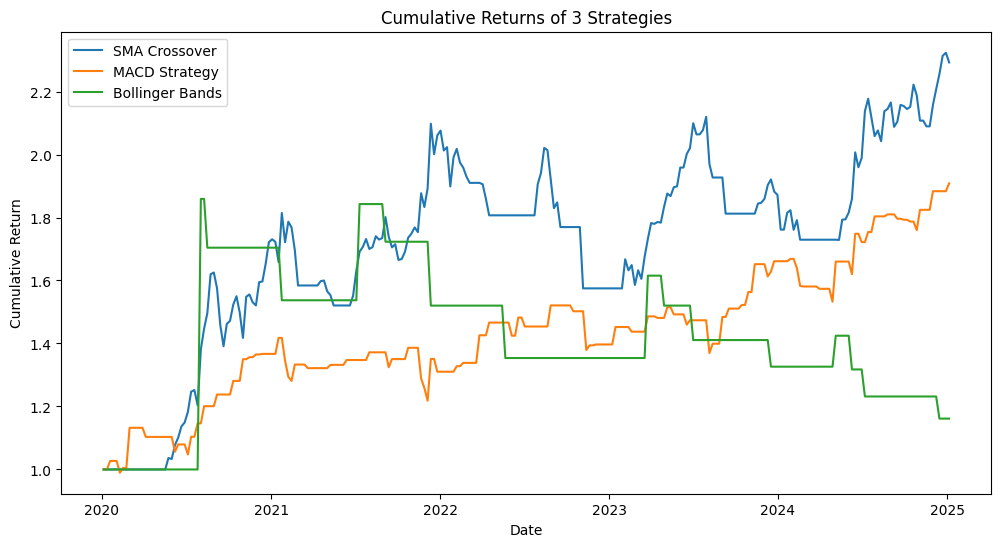

In [109]:
data[['SMA_Return', 'MACD_Return', 'BB_Return']] = data[['SMA_Return', 'MACD_Return', 'BB_Return']].fillna(0)
data[['Cumulative_SMA', 'Cumulative_MACD', 'Cumulative_BB']] = (1 + data[['SMA_Return', 'MACD_Return', 'BB_Return']]).cumprod()
# Vẽ so sánh
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Cumulative_SMA'], label='SMA Crossover')
plt.plot(data['Date'], data['Cumulative_MACD'], label='MACD Strategy')
plt.plot(data['Date'], data['Cumulative_BB'], label='Bollinger Bands')
plt.title("Cumulative Returns of 3 Strategies")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

<h1>Bước 3: xử lý đa cộng tuyến</h1>
Các chỉ số đã được tính toán ở 3 chiến lược nên phần này chỉ phân tích và xử lý đa cộng tuyến


In [110]:
data.fillna(0, inplace=True)

data.isnull().sum()

,0
index,0
Date,0
Volume,0
SMA_Return,0
Close,0
SMA1,0
SMA20,0
SMA_Signal,0
Position,0
MACD_Return,0


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

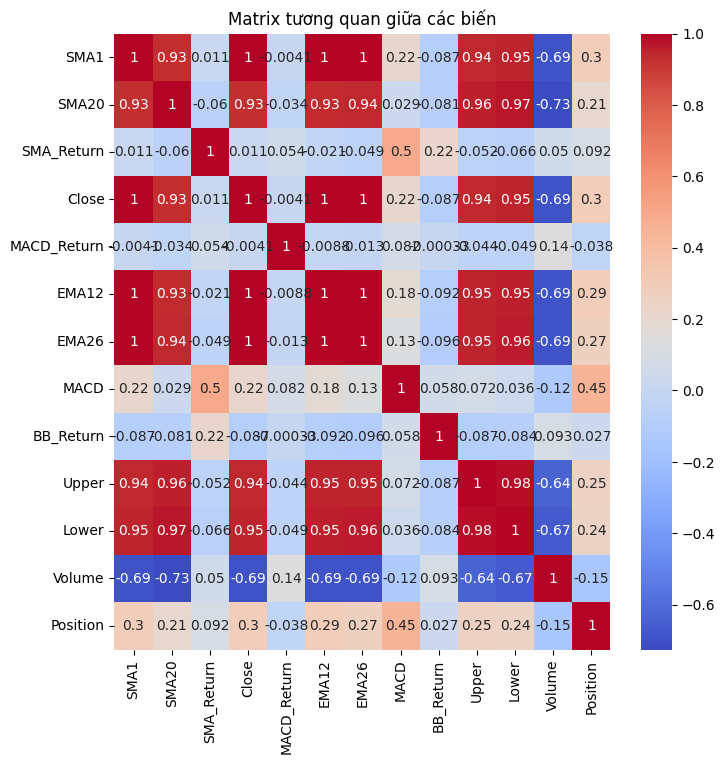

In [112]:
features = ['SMA1', 'SMA20', 'SMA_Return', 'Close', 'MACD_Return', 'EMA12', 'EMA26', 'MACD', 'BB_Return', 'Upper', 'Lower', 'Volume', 'Position']

corr_matrix = data[features].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrix tương quan giữa các biến")
plt.show()

# => bỏ upper, bỏ SMA1, Close, Upper

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ['SMA_Return', 'MACD_Return', 'MACD', 'BB_Return', 'Volume', 'Lower', 'EMA26', 'Position']

# Tính VIF cho từng biến
X = data[features].dropna()
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)

# Sau khi xóa các biến có độ tương quan cao thì các biến còn lại có chỉ số vif < 5 nên không cần tiếp tục xóa

       Feature         VIF
0   SMA_Return    1.489995
1  MACD_Return    1.055503
2         MACD    2.092083
3    BB_Return    1.069324
4       Volume    3.116389
5        Lower  134.821306
6        EMA26  151.018605
7     Position    3.978509


<h1>Bước 4 dùng Grid để tìm tham số tối ưu cho mô hình Logistic và kết hợp walk forward optimization</h1>

In [114]:
# Gắn nhãn tăng/giảm
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

data.dropna(subset=features, inplace=True)
data.reset_index(drop=True, inplace=True)

# Xác định các đặc trưng (features) và mục tiêu (target)
X = data[features]
y = data['Target']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Thiết lập tập cross-validation theo thời gian (walk forward)
tscv = TimeSeriesSplit(n_splits=5)

# Tạo lưới tham số (hyperparameter grid)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # Độ phạt (regularization)
    'penalty': ['l2'],                            # Loại regularization (chỉ 'l2' cho solver='lbfgs')
    'solver': ['lbfgs'],                          # Solver hiệu quả cho logistic regression
    'max_iter': [500, 1000]                       # Đảm bảo hội tụ
}

# Tạo mô hình và GridSearch
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit dữ liệu
grid_search.fit(X_scaled, y)

best_params = grid_search.best_params_

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


Best parameters: {'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated score: 0.5581395348837208


In [115]:
data.fillna(0, inplace=True)

<h1></h1>

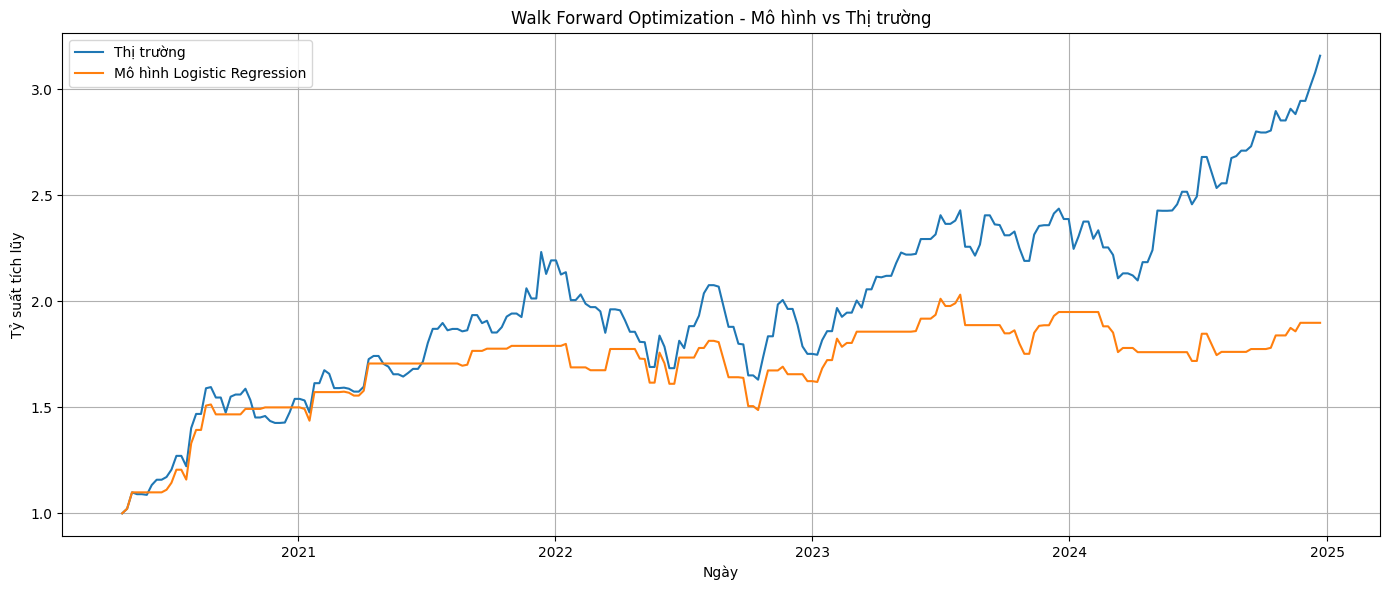

In [116]:
data.dropna(subset=features + ['Target'], inplace=True)
data.reset_index(drop=True, inplace=True)


# Cài đặt thông số cửa sổ Walk Forward
window_total = 20      # increased window size for more data in each fold
train_ratio = 0.8
train_size = int(window_total * train_ratio)
test_size = window_total - train_size
step_size = test_size   # di chuyển cửa sổ theo mỗi lần test

results = []

# Bắt đầu Walk Forward Loop
start = 0
while start + window_total <= len(data):
    train = data.iloc[start:start+train_size].copy()
    test = data.iloc[start+train_size:start+window_total].copy()

    # Kiểm tra xem tập huấn luyện có đủ cả hai lớp không
    if len(train['Target'].unique()) < 2:
        print(f"Skipping window starting at {data.iloc[start]['Date']} due to single class in training data.")
        start += step_size
        continue


    # Chuẩn hóa dữ liệu
    # Ensure features exist in the train and test dataframes
    X_train = scaler.fit_transform(train[features])
    X_test = scaler.transform(test[features])

    y_train = train['Target'].values
    y_test = test['Target'].values


    # Huấn luyện mô hình
    model = LogisticRegression(
        C=best_params['C'],
        penalty=best_params['penalty'],
        solver=best_params['solver'],
        max_iter=best_params['max_iter'],
        class_weight='balanced' # Add class_weight='balanced'
    )
    model.fit(X_train, y_train)

    # Dự đoán và lưu lại
    test['Prediction'] = model.predict(X_test)
    test['Prob_Up'] = model.predict_proba(X_test)[:, 1]

    # Calculate Strategy Return and Market Return - ensure 'Close' is available in test
    if 'Close' in test.columns:
        test['Strategy_Return'] = test['Prediction'].shift(1) * test['Close'].pct_change()
        test['Market_Return'] = test['Close'].pct_change()
    else:
        test['Strategy_Return'] = np.nan
        test['Market_Return'] = np.nan
        print(f"Warning: 'Close' column not found in test data for return calculation at window start {test.iloc[0]['Date']}.")


    results.append(test)

    start += step_size

# Chỉ nối các DataFrame nếu danh sách results không rỗng
if results:
    results_df = pd.concat(results)
else:
    results_df = pd.DataFrame() # Tạo DataFrame rỗng nếu không có kết quả nào

# Tổng hợp và đánh giá mô hình (Chỉ khi results_df không rỗng)
if not results_df.empty and 'Close' in results_df.columns: # Ensure 'Close' is in results_df for cumulative returns
    accuracy = accuracy_score(results_df['Target'], results_df['Prediction'])
    precision = precision_score(results_df['Target'], results_df['Prediction'], zero_division=0)
    recall = recall_score(results_df['Target'], results_df['Prediction'], zero_division=0)

    # Biểu đồ kết quả
    results_df['Cumulative_Strategy'] = (1 + results_df['Strategy_Return'].fillna(0)).cumprod()
    results_df['Cumulative_Market'] = (1 + results_df['Market_Return'].fillna(0)).cumprod()

    plt.figure(figsize=(14, 6))
    plt.plot(results_df['Date'], results_df['Cumulative_Market'], label='Thị trường')
    plt.plot(results_df['Date'], results_df['Cumulative_Strategy'], label='Mô hình Logistic Regression')
    plt.title('Walk Forward Optimization - Mô hình vs Thị trường')
    plt.xlabel('Ngày')
    plt.ylabel('Tỷ suất tích lũy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Không có kết quả nào từ Walk Forward Optimization hoặc 'Close' column is missing in results_df.")

<h1> Bước 5: So sánh mô hình Logistic với mô hình cơ sở </h1>

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# === Max Drawdown ===
cum_return = (1 + results_df['Strategy_Return']).cumprod()
running_max = cum_return.cummax()
drawdown = (cum_return - running_max) / running_max
max_drawdown_lr = drawdown.min()

# === Tối ưu threshold theo xác suất dự đoán ===
# Giả sử kết quả xác suất được lưu trong cột 'Prob_Up' trong results_df
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0.5
for t in thresholds:
    preds = (results_df['Prob_Up'] >= t).astype(int)
    f1 = f1_score(results_df['Target'], preds, zero_division=0) # Add zero_division=0
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# === Dự đoán lại với threshold tối ưu ===
results_df['Prediction_Thresholded'] = (results_df['Prob_Up'] >= best_threshold).astype(int)

# === Đánh giá lại mô hình ===
acc_lr = accuracy_score(results_df['Target'], results_df['Prediction_Thresholded'])
prec_lr = precision_score(results_df['Target'], results_df['Prediction_Thresholded'], zero_division=0)
rec_lr = recall_score(results_df['Target'], results_df['Prediction_Thresholded'], zero_division=0)
f1 = f1_score(results_df['Target'], results_df['Prediction_Thresholded'], zero_division=0) # Add zero_division=0

In [118]:
def generate_signals(df_results):
    signals = []
    # Use the thresholded predictions from the Logistic Regression model
    for i in range(len(df_results)):
        # Assuming 1 means buy signal and 0 means sell/hold signal
        signal = df_results['Prediction_Thresholded'].iloc[i]
        # If the prediction is 0 (no predicted increase), we consider it a sell/hold signal (-1 or 0)
        # If the prediction is 1 (predicted increase), we consider it a buy signal (1)
        # We can map 0 to -1 for sell signals explicitly if needed for backtesting logic
        # For simplicity, let's use 1 for buy and 0 for sell/hold based on prediction
        signals.append(signal if signal == 1 else 0) # Or -1 for sell signals
    df_results['Signal_Strategy'] = signals
    return df_results

# Apply the signal generation using the results_df from the Walk Forward Optimization
results_df = generate_signals(results_df.copy())

In [119]:
def backtest(df, signal_col='Signal_Strategy', price_col='Close'):
    capital = 100000
    position = 0
    returns = []

    for i in range(1, len(df)):
        # Use the signal from the previous period to make a trade
        if df[signal_col].iloc[i-1] == 1:  # If the signal was buy in the previous period
            # Assume we buy at the closing price of the previous period
            buy_price = df[price_col].iloc[i-1]
            # Assume we sell at the closing price of the current period
            sell_price = df[price_col].iloc[i]
            # Calculate the return for this trade
            profit = (sell_price - buy_price) / buy_price
            returns.append(profit)

    # Calculate total return and Sharpe Ratio
    total_return = np.sum(returns) if returns else 0 # Handle empty returns list
    sharpe = np.mean(returns) / np.std(returns) * np.sqrt(252) if returns and np.std(returns) > 0 else 0

    return total_return, sharpe, returns # Return the list of returns

# Use the results_df which contains the 'Signal_Strategy' column
total_return, sharpe_ratio_lr, strategy_returns = backtest(results_df, signal_col='Signal_Strategy', price_col='Close')

In [120]:
# Mô hình cơ sở: dự đoán luôn tăng
# Use the 'data' DataFrame for the baseline model comparison
baseline_df = data.copy()
baseline_df['baseline_pred'] = 1  # dự đoán luôn tăng (nếu mã hóa target là 1 cho tăng)

# Ensure 'Target' column exists and drop rows with NaN values in relevant columns
baseline_df.dropna(subset=['Target', 'baseline_pred'], inplace=True)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for the baseline model
acc = accuracy_score(baseline_df['Target'], baseline_df['baseline_pred'])
# Use zero_division parameter to handle cases where there are no positive predictions in the baseline
prec = precision_score(baseline_df['Target'], baseline_df['baseline_pred'], zero_division=0)
rec = recall_score(baseline_df['Target'], baseline_df['baseline_pred'], zero_division=0)
f1_bl = f1_score(baseline_df['Target'], baseline_df['baseline_pred'], zero_division=0)

returns_bl = results_df['Market_Return'].fillna(0)
if returns_bl.std() == 0:
    sharpe_ratio_bl = np.nan
else:
    sharpe_ratio_bl = np.mean(returns_bl) / np.std(returns_bl) * np.sqrt(252)

# === Max Drawdown ===
cumulative_bl = (1 + returns_bl).cumprod()
roll_max_bl = cumulative_bl.cummax()
drawdown_bl = cumulative_bl / roll_max_bl - 1
max_drawdown_bl = drawdown_bl.min()

# Tạo bảng so sánh
comparison_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Sharpe Ratio', 'Max Drawdown (%)'],
    'Mô hình cơ sở (Baseline)': [
        acc,
        prec,
        rec,
        f1_bl,
        sharpe_ratio_bl,
        max_drawdown_bl * 100
    ],
    'Mô hình Logistic Regression': [
        acc_lr,
        prec_lr,
        rec_lr,
        f1,
        sharpe_ratio_lr,
        max_drawdown_lr * 100
    ]
})

# Định dạng bảng cho dễ đọc
comparison_table['Mô hình cơ sở (Baseline)'] = comparison_table['Mô hình cơ sở (Baseline)'].map('{:.2f}'.format)
comparison_table.loc[5, 'Mô hình cơ sở (Baseline)'] = comparison_table.loc[5, 'Mô hình cơ sở (Baseline)'].replace('.00', '') + '%'


comparison_table['Mô hình Logistic Regression'] = comparison_table['Mô hình Logistic Regression'].map('{:.2f}'.format)
comparison_table.loc[5, 'Mô hình Logistic Regression'] = comparison_table.loc[5, 'Mô hình Logistic Regression'].replace('.00', '') + '%'


print("\n📊 Bảng so sánh hiệu suất:")
print(comparison_table.to_string(index=False))


📊 Bảng so sánh hiệu suất:
          Metric Mô hình cơ sở (Baseline) Mô hình Logistic Regression
        Accuracy                     0.57                        0.58
       Precision                     0.57                        0.58
          Recall                     1.00                        0.99
        F1-Score                     0.73                        0.73
    Sharpe Ratio                     2.61                        2.75
Max Drawdown (%)                  -26.96%                     -17.99%


Thống kê mô tả Strategy_Return:
count    183.000000
mean       0.003898
std        0.028303
min       -0.081300
25%        0.000000
50%        0.000000
75%        0.005015
max        0.147330
Name: Strategy_Return, dtype: float64
Sharpe Ratio: 2.754
Max Drawdown: -17.99%
Win Rate: 21.72%
Cumulative Return: 89.82%


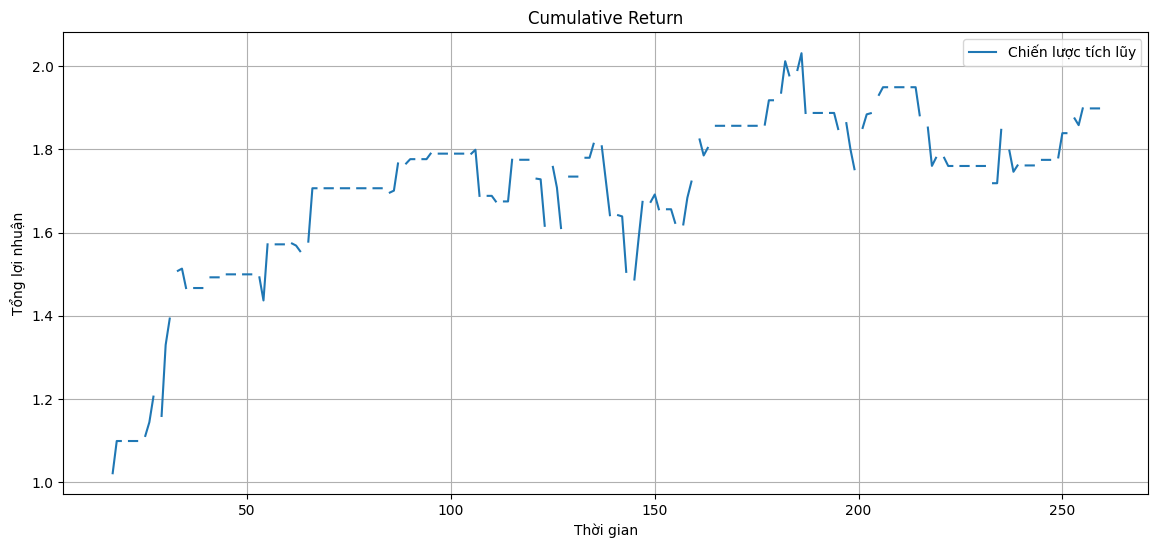

In [121]:
# 1. Mô tả cơ bản
print("Thống kê mô tả Strategy_Return:")
print(results_df['Strategy_Return'].describe())

# 2. Tính Sharpe Ratio
print(f"Sharpe Ratio: {sharpe_ratio_lr:.3f}")

# 3. Max Drawdown
print(f"Max Drawdown: {max_drawdown_lr:.2%}")

# 4. Win rate
results_df['is_win'] = results_df['Strategy_Return'] > 0
win_rate = results_df['is_win'].mean()
print(f"Win Rate: {win_rate:.2%}")

# 5. Tổng lợi nhuận
total_return = cum_return.iloc[-1] - 1
print(f"Cumulative Return: {total_return:.2%}")

plt.figure(figsize=(14,6))
plt.plot(cum_return, label='Chiến lược tích lũy')
plt.title('Cumulative Return')
plt.xlabel('Thời gian')
plt.ylabel('Tổng lợi nhuận')
plt.grid(True)
plt.legend()
plt.show()

### 📈 Bước 6: Xây dựng chiến lược giao dịch


💸 Tổng lợi nhuận: 119.39% trên vốn ban đầu $10000
📄 Danh sách giao dịch:
 - BUY tại 2020-08-16 giá $111.90
 - SELL tại 2022-03-13 giá $152.06
 - BUY tại 2022-03-20 giá $161.15
 - SELL tại 2022-04-03 giá $171.31
 - BUY tại 2022-04-10 giá $167.16
 - SELL-END tại 2024-12-22 giá $253.88


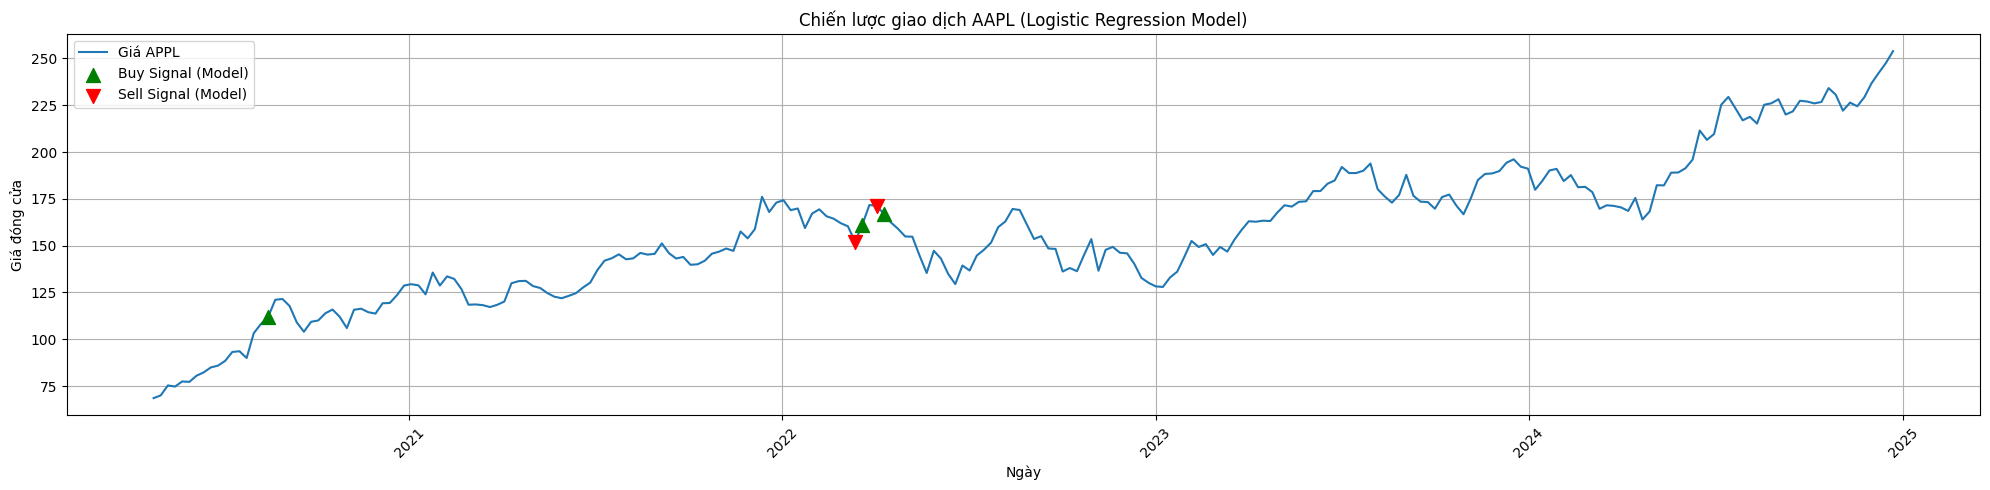

In [122]:
initial_cash = 10000  # số vốn ban đầu
cash = initial_cash
position = 0
entry_price = 0
trades = []

# Get buy and sell indices based on the thresholded predictions from results_df
buy_idx = results_df[results_df['Prediction_Thresholded'] == 1].index
sell_idx = results_df[results_df['Prediction_Thresholded'] == 0].index # Assuming 0 means sell/exit position

for i in range(len(results_df)):
    row = results_df.iloc[i]
    current_date = row['Date']
    current_price = row['Close']

    if i in buy_idx and position == 0:
        entry_price = current_price
        position = cash / entry_price  # mua toàn bộ
        cash = 0
        trades.append(('BUY', current_date, entry_price))

    elif i in sell_idx and position > 0:
        exit_price = current_price
        cash = position * exit_price  # bán toàn bộ
        position = 0
        trades.append(('SELL', current_date, exit_price))

# Nếu còn giữ cổ phiếu đến cuối kỳ thì tính theo giá cuối cùng
if position > 0:
    final_price = results_df['Close'].iloc[-1]
    cash = position * final_price
    trades.append(('SELL-END', results_df['Date'].iloc[-1], final_price))

total_return = (cash - initial_cash) / initial_cash * 100
print(f"\n💸 Tổng lợi nhuận: {total_return:.2f}% trên vốn ban đầu ${initial_cash}")
print("📄 Danh sách giao dịch:")
for action, date, price in trades:
    print(f" - {action} tại {date.date()} giá ${price:.2f}")

# 14. Vẽ biểu đồ
plt.figure(figsize=(20,5))
plt.plot(results_df['Date'], results_df['Close'], label='Giá APPL')

# Plot buy and sell signals from the backtesting
buy_dates = [trade[1] for trade in trades if trade[0] == 'BUY']
buy_prices = [trade[2] for trade in trades if trade[0] == 'BUY']
sell_dates = [trade[1] for trade in trades if trade[0] == 'SELL']
sell_prices = [trade[2] for trade in trades if trade[0] == 'SELL']


plt.scatter(buy_dates, buy_prices, label='Buy Signal (Model)', color='green', marker='^', s=100, zorder=10)
plt.scatter(sell_dates, sell_prices, label='Sell Signal (Model)', color='red', marker='v', s=100, zorder=10)


plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.title("Chiến lược giao dịch AAPL (Logistic Regression Model)") # Changed title to AAPL
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔄 Bước 7: Backtest chiến lược và kiểm định thống kê

In [123]:
def backtest(df, signal_col='Signal_Strategy', price_col='Close'):
    capital = 100000
    position = 0
    returns = []

    for i in range(1, len(df)):
        # Use the signal from the previous period to make a trade
        if df[signal_col].iloc[i-1] == 1:  # If the signal was buy in the previous period
            # Assume we buy at the closing price of the previous period
            buy_price = df[price_col].iloc[i-1]
            # Assume we sell at the closing price of the current period
            sell_price = df[price_col].iloc[i]
            # Calculate the return for this trade
            profit = (sell_price - buy_price) / buy_price
            returns.append(profit)

    # Calculate total return and Sharpe Ratio
    total_return = np.sum(returns) if returns else 0 # Handle empty returns list
    sharpe = np.mean(returns) / np.std(returns) * np.sqrt(252) if returns and np.std(returns) > 0 else 0

    return total_return, sharpe, returns # Return the list of returns

# Use the results_df which contains the 'Signal_Strategy' column
total_return, sharpe_ratio_lr, strategy_returns = backtest(results_df, signal_col='Signal_Strategy', price_col='Close')

print(f"Tổng lợi nhuận: {total_return*100:.2f}%")
print(f"Sharpe ratio: {sharpe_ratio_lr:.2f}")

# Kiểm định giả thuyết
from scipy.stats import ttest_1samp
# Perform t-test only if there are returns
if strategy_returns:
    t_stat, p_value = ttest_1samp(strategy_returns, 0)
    print(f"p-value = {p_value:.4f}")
    if p_value < 0.1:
        print("→ Bác bỏ H0: Chiến lược có khả năng sinh lời thực sự.")
    else:
        print("→ Không đủ bằng chứng để bác bỏ H0.")
else:
    print("Không có giao dịch nào được thực hiện trong quá trình backtest.")

Tổng lợi nhuận: 154.72%
Sharpe ratio: 2.75
p-value = 0.0077
→ Bác bỏ H0: Chiến lược có khả năng sinh lời thực sự.
